In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import gc

from matplotlib import rcParams
# rcParams['axes.titlepad'] = 12
rcParams['font.weight'] ='bold'
rcParams['legend.fontsize'] = 22

In [2]:
nagpur_ctp_data = pd.read_csv("../data/computed_tropopause_data_NEW/nagpur_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
delhi_ctp_data = pd.read_csv("../data/computed_tropopause_data_NEW/delhi_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
guwahati_ctp_data = pd.read_csv("../data/computed_tropopause_data_NEW/guwahati_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
karaikal_ctp_data = pd.read_csv("../data/computed_tropopause_data_NEW/karaikal_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
mangalore_ctp_data = pd.read_csv("../data/computed_tropopause_data_NEW/mangalore_all_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])

nagpur_ctp_data_ST = pd.read_csv("../data/computed_tropopause_data_ST/nagpur_all_ST_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
delhi_ctp_data_ST = pd.read_csv("../data/computed_tropopause_data_ST/delhi_all_ST_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
guwahati_ctp_data_ST = pd.read_csv("../data/computed_tropopause_data_ST/guwahati_all_ST_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
karaikal_ctp_data_ST = pd.read_csv("../data/computed_tropopause_data_ST/karaikal_all_ST_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])
mangalore_ctp_data_ST = pd.read_csv("../data/computed_tropopause_data_ST/mangalore_all_ST_data_cloudtop_analysis_NEW.csv", usecols=["Range", "yearly_total"])

In [3]:
nagpur_monthly_data = pd.read_csv("../data/computed_tropopause_data_NEW/nagpur_all_data_monthly_analysis.csv")
delhi_monthly_data = pd.read_csv("../data/computed_tropopause_data_NEW/delhi_all_data_monthly_analysis.csv")
guwahati_monthly_data = pd.read_csv("../data/computed_tropopause_data_NEW/guwahati_all_data_monthly_analysis.csv")
karaikal_monthly_data = pd.read_csv("../data/computed_tropopause_data_NEW/karaikal_all_data_monthly_analysis.csv")
mangalore_monthly_data = pd.read_csv("../data/computed_tropopause_data_NEW/mangalore_all_data_monthly_analysis.csv")

In [ ]:
delhi_ctp_data["yearly_total"].sum()
# nagpur_ctp_data["yearly_total"].sum()

In [5]:
# # remove spaces from Range col
nagpur_ctp_data_ST["Range"] = [x.replace(' ','') for x in nagpur_ctp_data_ST["Range"].tolist()]
delhi_ctp_data_ST["Range"] = [x.replace(' ','') for x in delhi_ctp_data_ST["Range"].tolist()]
guwahati_ctp_data_ST["Range"] = [x.replace(' ','') for x in guwahati_ctp_data_ST["Range"].tolist()]
mangalore_ctp_data_ST["Range"] = [x.replace(' ','') for x in mangalore_ctp_data_ST["Range"].tolist()]
karaikal_ctp_data_ST["Range"] = [x.replace(' ','') for x in karaikal_ctp_data_ST["Range"].tolist()]

nagpur_ctp_data["Range"] = [x.replace(' ','') for x in nagpur_ctp_data["Range"].tolist()]
delhi_ctp_data["Range"] = [x.replace(' ','') for x in delhi_ctp_data["Range"].tolist()]
guwahati_ctp_data["Range"] = [x.replace(' ','') for x in guwahati_ctp_data["Range"].tolist()]
mangalore_ctp_data["Range"] = [x.replace(' ','') for x in mangalore_ctp_data["Range"].tolist()]
karaikal_ctp_data["Range"] = [x.replace(' ','') for x in karaikal_ctp_data["Range"].tolist()]

# for Range col, convert "80 - 90" to "80"
# nagpur_ctp_data["Range"] = [x.split(' ')[0] for x in nagpur_ctp_data["Range"].tolist()]
# delhi_ctp_data["Range"] = [x.split(' ')[0] for x in delhi_ctp_data["Range"].tolist()]
# guwahati_ctp_data["Range"] = [x.split(' ')[0] for x in guwahati_ctp_data["Range"].tolist()]
# mangalore_ctp_data["Range"] = [x.split(' ')[0] for x in mangalore_ctp_data["Range"].tolist()]
# karaikal_ctp_data["Range"] = [x.split(' ')[0] for x in karaikal_ctp_data["Range"].tolist()]

# convert yearly_total to % - for DT
delhi_ctp_data["yearly_total"] = delhi_ctp_data["yearly_total"].div(1758) * 100.0
nagpur_ctp_data["yearly_total"] = nagpur_ctp_data["yearly_total"].div(595) * 100.0
mangalore_ctp_data["yearly_total"] = mangalore_ctp_data["yearly_total"].div(287) * 100.0
karaikal_ctp_data["yearly_total"] = karaikal_ctp_data["yearly_total"].div(431) * 100.0
guwahati_ctp_data["yearly_total"] = guwahati_ctp_data["yearly_total"].div(365) * 100.0

# convert yearly_total to % - for ST
delhi_ctp_data_ST["yearly_total"] = delhi_ctp_data_ST["yearly_total"].div(483) * 100.0
nagpur_ctp_data_ST["yearly_total"] = nagpur_ctp_data_ST["yearly_total"].div(137) * 100.0
mangalore_ctp_data_ST["yearly_total"] = mangalore_ctp_data_ST["yearly_total"].div(51) * 100.0
karaikal_ctp_data_ST["yearly_total"] = karaikal_ctp_data_ST["yearly_total"].div(45) * 100.0
guwahati_ctp_data_ST["yearly_total"] = guwahati_ctp_data_ST["yearly_total"].div(108) * 100.0


In [8]:
nagpur_ctp_data

Range  yearly_total      diff
0    80-90      1.848739  0.388885
1   90-100     12.605042  1.656137
2  100-150      9.747899 -1.930933
3  150-200     16.134454  2.265841
4  200-250     12.605042 -1.263571
5  250-300      5.042017 -0.797399
6  300-350      3.193277  0.273569
7  350-400      1.512605  0.782678

In [7]:
delhi_ctp_data["diff"] = delhi_ctp_data["yearly_total"] - delhi_ctp_data_ST["yearly_total"]
nagpur_ctp_data["diff"] = nagpur_ctp_data["yearly_total"] - nagpur_ctp_data_ST["yearly_total"]
mangalore_ctp_data["diff"] = mangalore_ctp_data["yearly_total"] - mangalore_ctp_data_ST["yearly_total"]
karaikal_ctp_data["diff"] = karaikal_ctp_data["yearly_total"] - karaikal_ctp_data_ST["yearly_total"]
guwahati_ctp_data["diff"] = guwahati_ctp_data["yearly_total"] - guwahati_ctp_data_ST["yearly_total"]

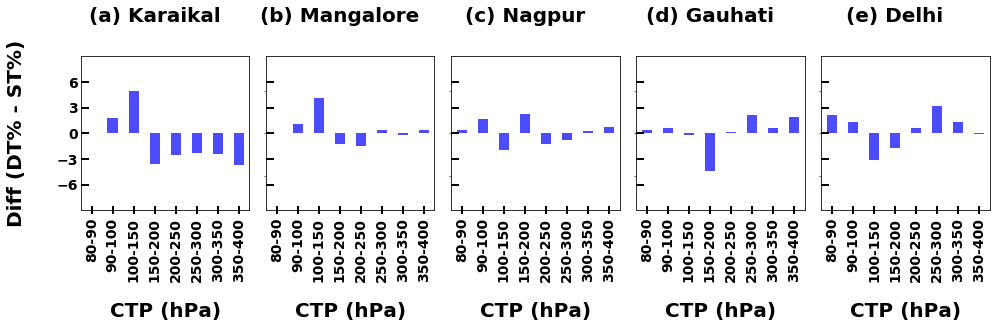

In [14]:
# plot DT - ST difference

import matplotlib.patches as mpatches
MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4))

axes[0].text(3, 13, "(a) Karaikal", horizontalalignment='center', fontsize=20, fontweight='bold')
karaikal_ctp_data.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="diff", ax=axes[0])

axes[1].text(3, 13, "(b) Mangalore", horizontalalignment='center', fontsize=20, fontweight='bold')
mangalore_ctp_data.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="diff", ax=axes[1])

axes[2].text(3, 13, "(c) Nagpur", horizontalalignment='center', fontsize=20, fontweight='bold')
nagpur_ctp_data.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="diff", ax=axes[2])

axes[3].text(3, 13, "(d) Gauhati", horizontalalignment='center', fontsize=20, fontweight='bold')
guwahati_ctp_data.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="diff", ax=axes[3])

axes[4].text(3, 13, "(e) Delhi", horizontalalignment='center', fontsize=20, fontweight='bold')
delhi_ctp_data.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="diff", ax=axes[4])


# plt.setp([a.get_xticklabels() for a in axes[2,:]], visible=True)
# plt.setp(axes[0], xticks=np.arange(8), xticklabels=karaikal_ctp_data_DT["Range"])
# axes[0,0].set_xlim((-1,8))
for i in range(5):
    axes[i].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=14)
    axes[i].tick_params(axis='y', direction='in', width=2, length=8, labelsize=14)
    axes[i].set_ylabel("Diff (DT% - ST%)", fontsize=20, labelpad=30, fontweight='bold')
    axes[i].set_xlabel("CTP (hPa)", fontsize=20, labelpad=20, fontweight='bold')
    axes[i].set_ylim([-9,9])
    axes[i].set_yticks([-6, -3, 0, 3, 6])

plt.tight_layout()
fig.subplots_adjust(hspace=0.7, wspace=0.1)
# fig.autofmt_xdate()
# plt.savefig("../plots/monthly_height_temp_2.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
plt.savefig("../plots/DT_ST_Diff_CTP_frequency_100km_CTTlt235.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
# plt.show()

In [11]:
delhi_monthly_data["percent_DT"] = delhi_monthly_data["Total_DT_Days"].div(delhi_monthly_data["TOTAL_COUNTS_DATA_VALID"]).multiply(100.0)
nagpur_monthly_data["percent_DT"] = nagpur_monthly_data["Total_DT_Days"].div(nagpur_monthly_data["TOTAL_COUNTS_DATA_VALID"]).multiply(100.0)
mangalore_monthly_data["percent_DT"] = mangalore_monthly_data["Total_DT_Days"].div(mangalore_monthly_data["TOTAL_COUNTS_DATA_VALID"]).multiply(100.0)
karaikal_monthly_data["percent_DT"] = karaikal_monthly_data["Total_DT_Days"].div(karaikal_monthly_data["TOTAL_COUNTS_DATA_VALID"]).multiply(100.0)
guwahati_monthly_data["percent_DT"] = guwahati_monthly_data["Total_DT_Days"].div(guwahati_monthly_data["TOTAL_COUNTS_DATA_VALID"]).multiply(100.0)

In [ ]:
nagpur_monthly_data.head()

In [ ]:
# # convert absolute counts to %
# delhi_monthly_data["Total_DT_Days"] = delhi_monthly_data["Total_DT_Days"].div(delhi_monthly_data["Total_DT_Days"].sum()).multiply(100.0)
# nagpur_monthly_data["Total_DT_Days"] = nagpur_monthly_data["Total_DT_Days"].div(nagpur_monthly_data["Total_DT_Days"].sum()).multiply(100.0)    
# mangalore_monthly_data["Total_DT_Days"] = mangalore_monthly_data["Total_DT_Days"].div(mangalore_monthly_data["Total_DT_Days"].sum()).multiply(100.0)
# karaikal_monthly_data["Total_DT_Days"] = karaikal_monthly_data["Total_DT_Days"].div(karaikal_monthly_data["Total_DT_Days"].sum()).multiply(100.0) 
# guwahati_monthly_data["Total_DT_Days"] = guwahati_monthly_data["Total_DT_Days"].div(guwahati_monthly_data["Total_DT_Days"].sum()).multiply(100.0) 

In [12]:
# convert height in metres to km
delhi_monthly_data["Mean_LRT1"] = delhi_monthly_data["Mean_LRT1"].div(1000.0)
nagpur_monthly_data["Mean_LRT1"] = nagpur_monthly_data["Mean_LRT1"].div(1000.0)
mangalore_monthly_data["Mean_LRT1"] = mangalore_monthly_data["Mean_LRT1"].div(1000.0)
karaikal_monthly_data["Mean_LRT1"] = karaikal_monthly_data["Mean_LRT1"].div(1000.0)
guwahati_monthly_data["Mean_LRT1"] = guwahati_monthly_data["Mean_LRT1"].div(1000.0)

delhi_monthly_data["Mean_LRT2"] = delhi_monthly_data["Mean_LRT2"].div(1000.0)
nagpur_monthly_data["Mean_LRT2"] = nagpur_monthly_data["Mean_LRT2"].div(1000.0)
mangalore_monthly_data["Mean_LRT2"] = mangalore_monthly_data["Mean_LRT2"].div(1000.0)
karaikal_monthly_data["Mean_LRT2"] = karaikal_monthly_data["Mean_LRT2"].div(1000.0)
guwahati_monthly_data["Mean_LRT2"] = guwahati_monthly_data["Mean_LRT2"].div(1000.0)

delhi_monthly_data["StdDev_LRT1"] = delhi_monthly_data["StdDev_LRT1"].div(1000.0)
nagpur_monthly_data["StdDev_LRT1"] = nagpur_monthly_data["StdDev_LRT1"].div(1000.0)
mangalore_monthly_data["StdDev_LRT1"] = mangalore_monthly_data["StdDev_LRT1"].div(1000.0)
karaikal_monthly_data["StdDev_LRT1"] = karaikal_monthly_data["StdDev_LRT1"].div(1000.0)
guwahati_monthly_data["StdDev_LRT1"] = guwahati_monthly_data["StdDev_LRT1"].div(1000.0)

delhi_monthly_data["StdDev_LRT2"] = delhi_monthly_data["StdDev_LRT2"].div(1000.0)
nagpur_monthly_data["StdDev_LRT2"] = nagpur_monthly_data["StdDev_LRT2"].div(1000.0)
mangalore_monthly_data["StdDev_LRT2"] = mangalore_monthly_data["StdDev_LRT2"].div(1000.0)
karaikal_monthly_data["StdDev_LRT2"] = karaikal_monthly_data["StdDev_LRT2"].div(1000.0)
guwahati_monthly_data["StdDev_LRT2"] = guwahati_monthly_data["StdDev_LRT2"].div(1000.0)

# keep StdDev values alternate, with offset b/w LRT1 and LRT2 -> error bars must be alternate to be visible
delhi_monthly_data["StdDev_LRT1"] = [x if index%2 == 0 else 0 for index, x in enumerate(delhi_monthly_data["StdDev_LRT1"].tolist())]
nagpur_monthly_data["StdDev_LRT1"] = [x if index%2 == 0 else 0 for index, x in enumerate(nagpur_monthly_data["StdDev_LRT1"].tolist())]
mangalore_monthly_data["StdDev_LRT1"] = [x if index%2 == 0 else 0 for index, x in enumerate(mangalore_monthly_data["StdDev_LRT1"].tolist())]
karaikal_monthly_data["StdDev_LRT1"] = [x if index%2 == 0 else 0 for index, x in enumerate(karaikal_monthly_data["StdDev_LRT1"].tolist())]
guwahati_monthly_data["StdDev_LRT1"] = [x if index%2 == 0 else 0 for index, x in enumerate(guwahati_monthly_data["StdDev_LRT1"].tolist())]

delhi_monthly_data["StdDev_Temp1"] = [x if index%2 == 0 else 0 for index, x in enumerate(delhi_monthly_data["StdDev_Temp1"].tolist())]
nagpur_monthly_data["StdDev_Temp1"] = [x if index%2 == 0 else 0 for index, x in enumerate(nagpur_monthly_data["StdDev_Temp1"].tolist())]
mangalore_monthly_data["StdDev_Temp1"] = [x if index%2 == 0 else 0 for index, x in enumerate(mangalore_monthly_data["StdDev_Temp1"].tolist())]
karaikal_monthly_data["StdDev_Temp1"] = [x if index%2 == 0 else 0 for index, x in enumerate(karaikal_monthly_data["StdDev_Temp1"].tolist())]
guwahati_monthly_data["StdDev_Temp1"] = [x if index%2 == 0 else 0 for index, x in enumerate(guwahati_monthly_data["StdDev_Temp1"].tolist())]

delhi_monthly_data["StdDev_LRT2"] = [x if index%2 == 1 else 0 for index, x in enumerate(delhi_monthly_data["StdDev_LRT2"].tolist())]
nagpur_monthly_data["StdDev_LRT2"] = [x if index%2 == 1 else 0 for index, x in enumerate(nagpur_monthly_data["StdDev_LRT2"].tolist())]
mangalore_monthly_data["StdDev_LRT2"] = [x if index%2 == 1 else 0 for index, x in enumerate(mangalore_monthly_data["StdDev_LRT2"].tolist())]
karaikal_monthly_data["StdDev_LRT2"] = [x if index%2 == 1 else 0 for index, x in enumerate(karaikal_monthly_data["StdDev_LRT2"].tolist())]
guwahati_monthly_data["StdDev_LRT2"] = [x if index%2 == 1 else 0 for index, x in enumerate(guwahati_monthly_data["StdDev_LRT2"].tolist())]

delhi_monthly_data["StdDev_Temp2"] = [x if index%2 == 1 else 0 for index, x in enumerate(delhi_monthly_data["StdDev_Temp2"].tolist())]
nagpur_monthly_data["StdDev_Temp2"] = [x if index%2 == 1 else 0 for index, x in enumerate(nagpur_monthly_data["StdDev_Temp2"].tolist())]
mangalore_monthly_data["StdDev_Temp2"] = [x if index%2 == 1 else 0 for index, x in enumerate(mangalore_monthly_data["StdDev_Temp2"].tolist())]
karaikal_monthly_data["StdDev_Temp2"] = [x if index%2 == 1 else 0 for index, x in enumerate(karaikal_monthly_data["StdDev_Temp2"].tolist())]
guwahati_monthly_data["StdDev_Temp2"] = [x if index%2 == 1 else 0 for index, x in enumerate(guwahati_monthly_data["StdDev_Temp2"].tolist())]


In [ ]:
delhi_monthly_data

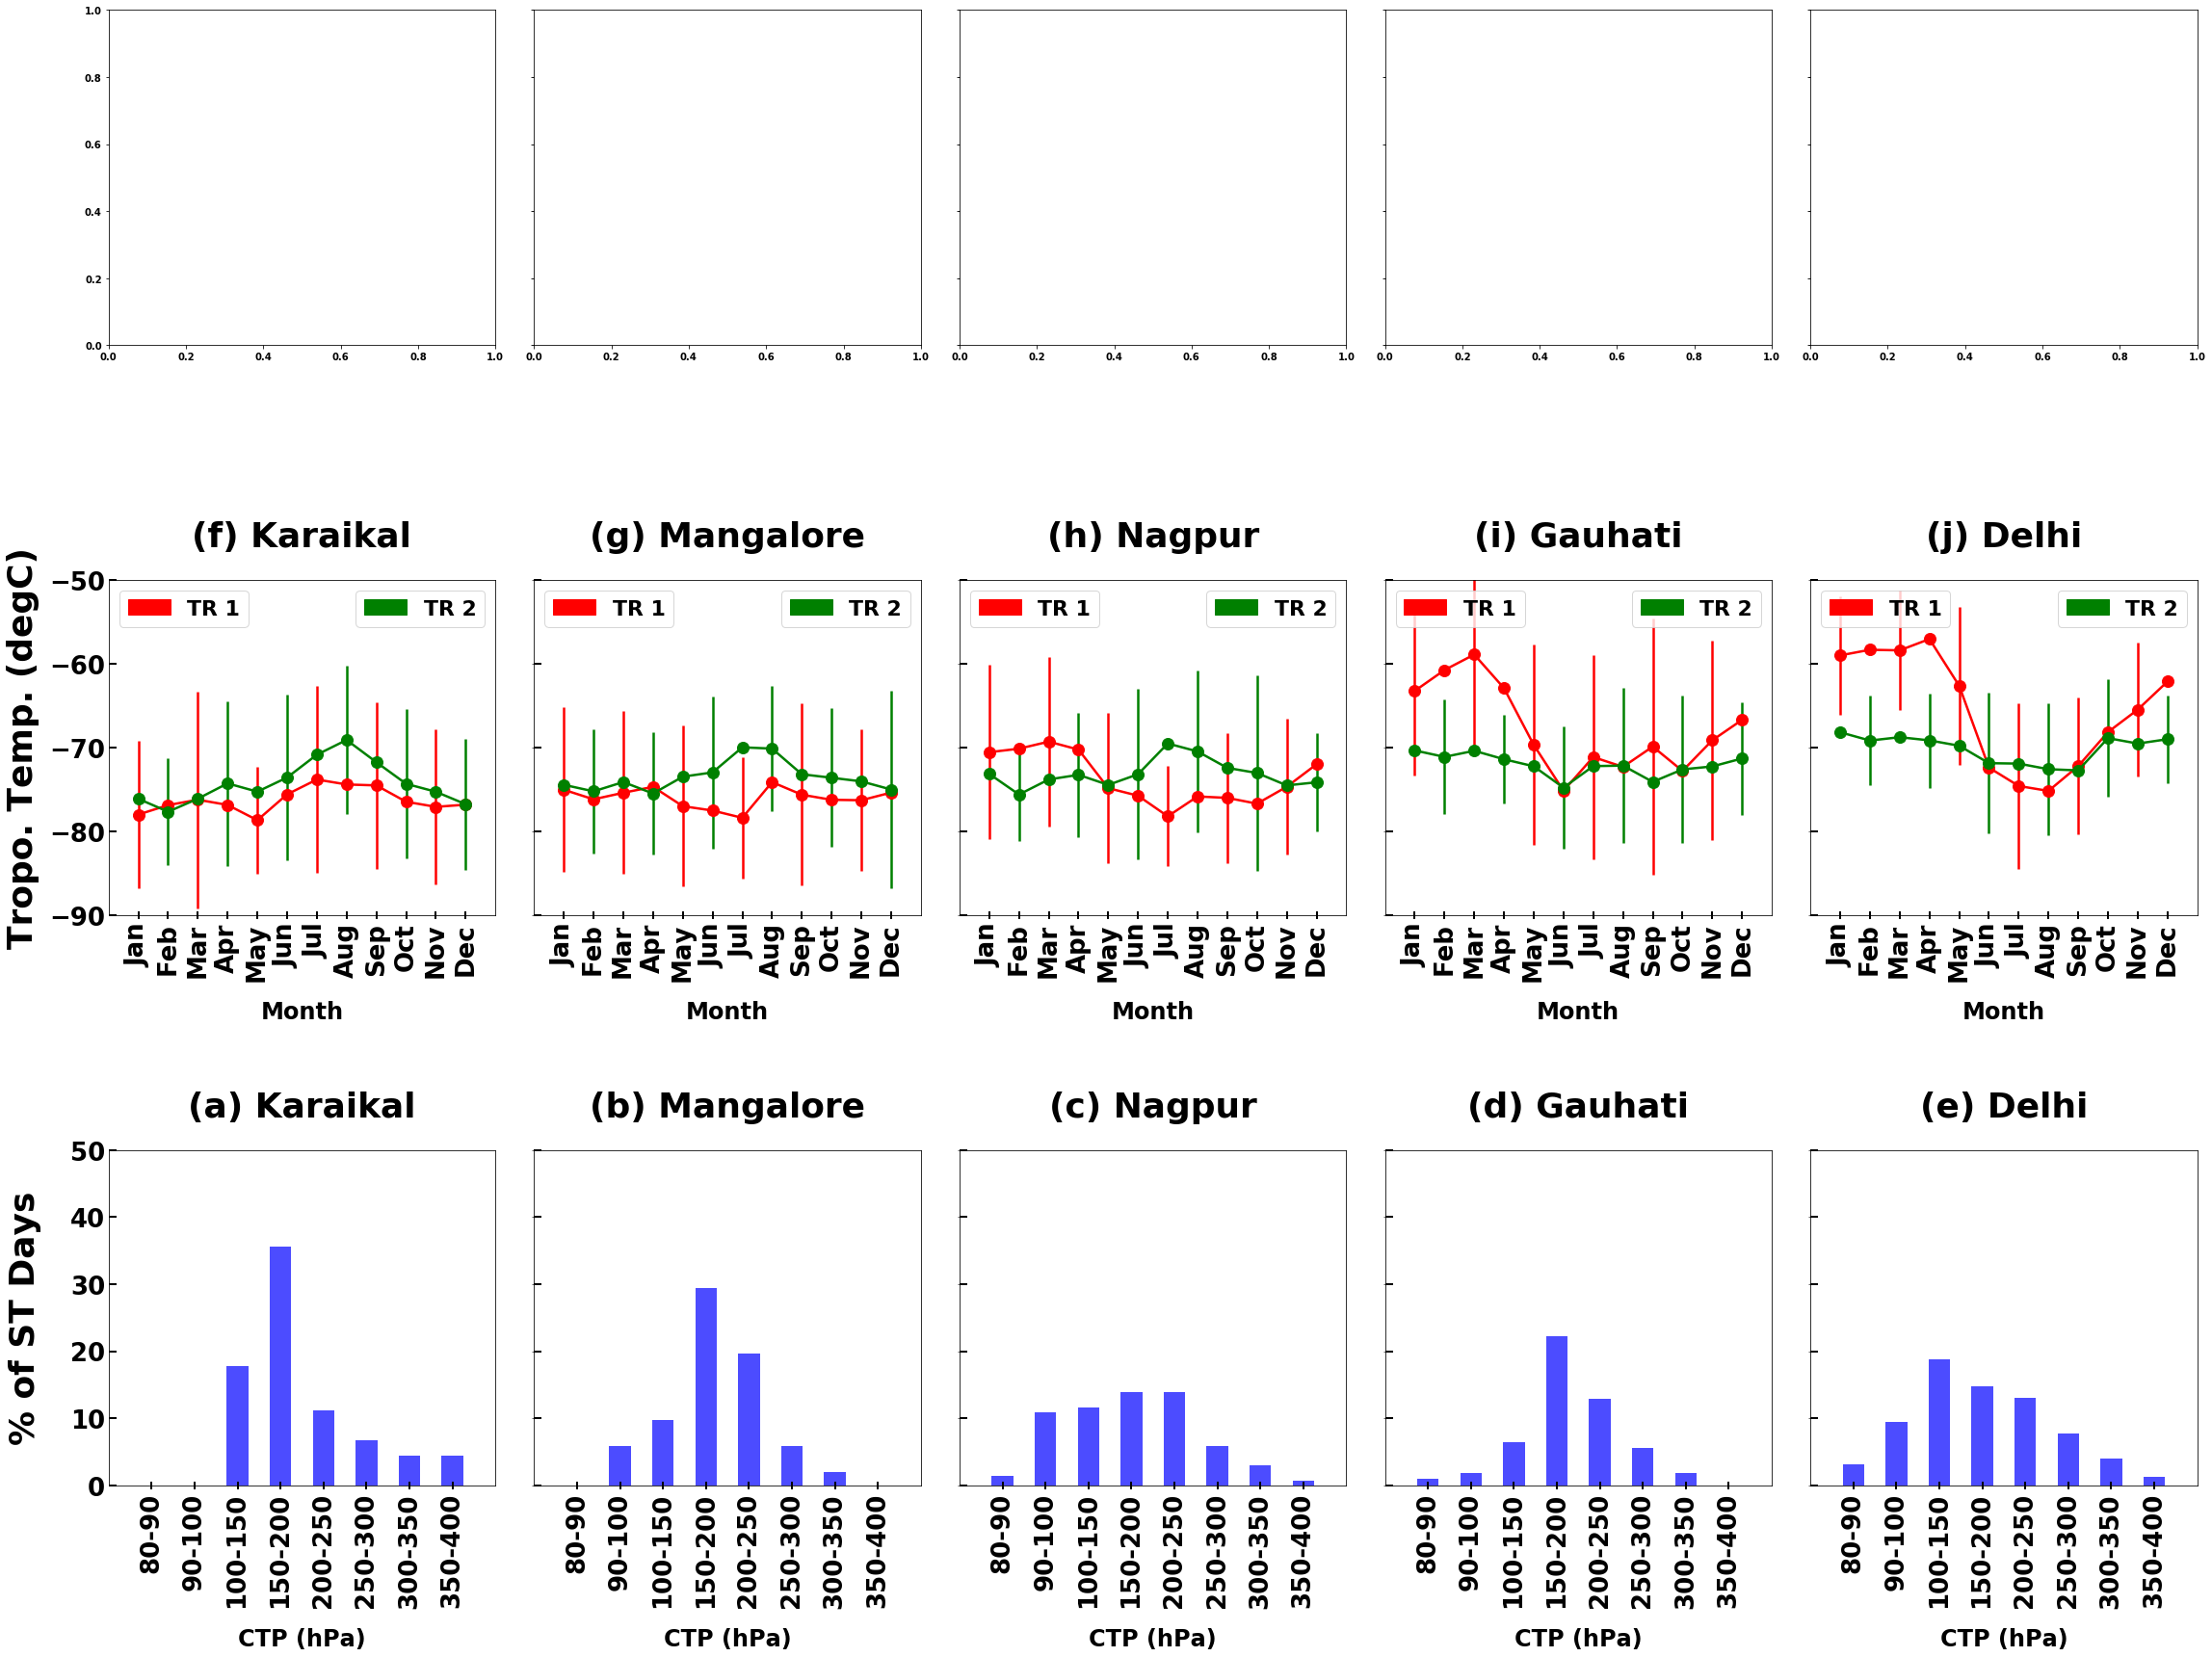

In [15]:
# http://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb
# https://stackoverflow.com/questions/21962508/stuffing-a-pandas-dataframe-plot-into-a-matplotlib-subplot
# https://stackoverflow.com/questions/37624012/multiple-legends-on-pandas-df-plot-subplots
# https://stackoverflow.com/questions/11983024/matplotlib-legends-not-working

import matplotlib.patches as mpatches
MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(32, 24))

# FIRST COLUMN - KARAIKAL
# ---------------------------------------------------------------------------------

# ----------------

plt.text(0.5, 1.1, "(f) Karaikal", horizontalalignment='center', fontsize=36,
         transform=axes[1,0].transAxes, fontweight='bold')
karaikal_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp1", legend=False, color='red', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp1", 
                                ax=axes[1,0])
karaikal_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp2", legend=False, color='green', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp2", 
                                ax=axes[1,0])
axes[1,0].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[1,0].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[1,0].set_ylabel("Tropo. Temp. (degC)", fontsize=36, labelpad=10, fontweight='bold')
axes[1,0].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[1,0].legend(handles=[red_patch], loc='upper left')
leg2 = axes[1,0].legend(handles=[green_patch], loc='upper right')
axes[1,0].add_artist(leg1)
axes[1,0].set_xlim((-1,12))
axes[1,0].set_ylim([-90,-50])
axes[1,0].set_yticks([-90, -80, -70, -60, -50])
plt.setp(axes[1,0], xticks=np.arange(12), xticklabels=MONTHS)
plt.setp([a.get_xticklabels() for a in axes[1,:]], visible=True)

# -----------
plt.text(0.5, 1.1, "(a) Karaikal", horizontalalignment='center', fontsize=36,
         transform=axes[2,0].transAxes, fontweight='bold')
karaikal_ctp_data_ST.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="yearly_total", ax=axes[2,0])
axes[2,0].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[2,0].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[2,0].set_ylabel("% of ST Days", fontsize=36, labelpad=30, fontweight='bold')
axes[2,0].set_xlabel("CTP (hPa)", fontsize=24, labelpad=20, fontweight='bold')
plt.setp([a.get_xticklabels() for a in axes[2,:]], visible=True)
plt.setp(axes[2,0], xticks=np.arange(8), xticklabels=karaikal_ctp_data["Range"])
axes[2,0].set_xlim((-1,8))
axes[2,0].set_ylim([0,50])
axes[2,0].set_yticks([0, 10, 20, 30, 40, 50])



# SECOND COLUMN - Mangalore
# ------------------------------------------------------------------------

# ------------------------

plt.text(0.5, 1.1, "(g) Mangalore", horizontalalignment='center', fontsize=36,
         transform=axes[1,1].transAxes, fontweight='bold')
mangalore_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp1", legend=False, color='red', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp1", 
                                ax=axes[1,1])
mangalore_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp2", legend=False, color='green', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp2", 
                                ax=axes[1,1])
axes[1,1].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[1,1].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[1,1].set_ylabel("Tropo. Temp. (degC)", fontsize=36, labelpad=10, fontweight='bold')
axes[1,1].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[1,1].legend(handles=[red_patch], loc='upper left')
leg2 = axes[1,1].legend(handles=[green_patch], loc='upper right')
axes[1,1].add_artist(leg1)
axes[1,1].set_xlim((-1,12))
axes[1,1].set_ylim([-90,-50])
axes[1,1].set_yticks([-90, -80, -70, -60, -50])
plt.setp(axes[1,1], xticks=np.arange(12), xticklabels=MONTHS)
plt.setp([a.get_xticklabels() for a in axes[1,:]], visible=True)

# -----------
plt.text(0.5, 1.1, "(b) Mangalore", horizontalalignment='center', fontsize=36,
         transform=axes[2,1].transAxes, fontweight='bold')
mangalore_ctp_data_ST.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="yearly_total", ax=axes[2,1])
axes[2,1].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[2,1].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[2,1].set_ylabel("% of DT Days", fontsize=36, labelpad=45, fontweight='bold')
axes[2,1].set_xlabel("CTP (hPa)", fontsize=24, labelpad=20, fontweight='bold')
plt.setp([a.get_xticklabels() for a in axes[2,:]], visible=True)
plt.setp(axes[2,1], xticks=np.arange(8), xticklabels=mangalore_ctp_data["Range"])
axes[2,1].set_xlim((-1,8))
axes[2,1].set_ylim([0,50])
axes[2,1].set_yticks([0, 10, 20, 30, 40, 50])



# THIRD COLUMN - Nagpur
# ------------------------------------------------------

# --------------------

plt.text(0.5, 1.1, "(h) Nagpur", horizontalalignment='center', fontsize=36,
         transform=axes[1,2].transAxes, fontweight='bold')
nagpur_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp1", legend=False, color='red', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp1", 
                                ax=axes[1,2])
nagpur_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp2", legend=False, color='green', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp2", 
                                ax=axes[1,2])
axes[1,2].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[1,2].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[1,2].set_ylabel("Tropo. Temp. (degC)", fontsize=36, labelpad=10, fontweight='bold')
axes[1,2].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[1,2].legend(handles=[red_patch], loc='upper left')
leg2 = axes[1,2].legend(handles=[green_patch], loc='upper right')
axes[1,2].add_artist(leg1)
axes[1,2].set_xlim((-1,12))
axes[1,2].set_ylim([-90,-50])
axes[1,2].set_yticks([-90, -80, -70, -60, -50])
plt.setp(axes[1,2], xticks=np.arange(12), xticklabels=MONTHS)
plt.setp([a.get_xticklabels() for a in axes[1,:]], visible=True)

# -----------

plt.text(0.5, 1.1, "(c) Nagpur", horizontalalignment='center', fontsize=36,
         transform=axes[2,2].transAxes, fontweight='bold')
nagpur_ctp_data_ST.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="yearly_total", ax=axes[2,2])
axes[2,2].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[2,2].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[2,2].set_ylabel("% of DT Days", fontsize=36, labelpad=45, fontweight='bold')
axes[2,2].set_xlabel("CTP (hPa)", fontsize=24, labelpad=20, fontweight='bold')
plt.setp([a.get_xticklabels() for a in axes[2,:]], visible=True)
plt.setp(axes[2,2], xticks=np.arange(8), xticklabels=nagpur_ctp_data["Range"])
axes[2,2].set_xlim((-1,8))
axes[2,2].set_ylim([0,50])
axes[2,2].set_yticks([0, 10, 20, 30, 40, 50])



# FOURTH COLUMN - Guwahati
# -------------------------------------------------------------


# -----------------

plt.text(0.5, 1.1, "(i) Gauhati", horizontalalignment='center', fontsize=36,
         transform=axes[1,3].transAxes, fontweight='bold')
guwahati_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp1", legend=False, color='red', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp1", 
                                ax=axes[1,3])
guwahati_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp2", legend=False, color='green', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp2", 
                                ax=axes[1,3])
axes[1,3].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[1,3].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[1,3].set_ylabel("Tropo. Temp. (degC)", fontsize=36, labelpad=10, fontweight='bold')
axes[1,3].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[1,3].legend(handles=[red_patch], loc='upper left')
leg2 = axes[1,3].legend(handles=[green_patch], loc='upper right')
axes[1,3].add_artist(leg1)
axes[1,3].set_xlim((-1,12))
axes[1,3].set_ylim([-90,-50])
axes[1,3].set_yticks([-90, -80, -70, -60, -50])
plt.setp(axes[1,3], xticks=np.arange(12), xticklabels=MONTHS)
plt.setp([a.get_xticklabels() for a in axes[1,:]], visible=True)

# -----------

plt.text(0.5, 1.1, "(d) Gauhati", horizontalalignment='center', fontsize=36,
         transform=axes[2,3].transAxes, fontweight='bold')
guwahati_ctp_data_ST.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                            x="Range", y="yearly_total", ax=axes[2,3])
axes[2,3].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[2,3].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[2,3].set_ylabel("% of DT Days", fontsize=36, labelpad=45, fontweight='bold')
axes[2,3].set_xlabel("CTP (hPa)", fontsize=24, labelpad=20, fontweight='bold')
plt.setp([a.get_xticklabels() for a in axes[2,:]], visible=True)
plt.setp(axes[2,3], xticks=np.arange(8), xticklabels=guwahati_ctp_data["Range"])
axes[2,3].set_xlim((-1,8))
axes[2,3].set_ylim([0,50])
axes[2,3].set_yticks([0, 10, 20, 30, 40, 50])




# FIFTH COLUMN = Delhi
# ----------------------------------------------------------

# ------------------

plt.text(0.5, 1.1, "(j) Delhi", horizontalalignment='center', fontsize=36,
         transform=axes[1,4].transAxes, fontweight='bold')
delhi_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp1", legend=False, color='red', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp1", 
                                ax=axes[1,4])
delhi_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_Temp2", legend=False, color='green', 
                                linewidth=2.5, markersize=12, marker="o", x="Month", y="Mean_Temp2", 
                                ax=axes[1,4])
axes[1,4].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[1,4].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[1,4].set_ylabel("Tropo. Temp. (degC)", fontsize=36, labelpad=10, fontweight='bold')
axes[1,4].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[1,4].legend(handles=[red_patch], loc='upper left')
leg2 = axes[1,4].legend(handles=[green_patch], loc='upper right')
axes[1,4].add_artist(leg1)
axes[1,4].set_xlim((-1,12))
# axes[1,4].set_ylim([-100,-40])
# axes[1,4].set_yticks([-100, -90, -80, -70, -60, -50, -40])
axes[1,4].set_ylim([-90,-50])
axes[1,4].set_yticks([-90, -80, -70, -60, -50])
plt.setp(axes[1,4], xticks=np.arange(12), xticklabels=MONTHS)
plt.setp([a.get_xticklabels() for a in axes[1,:]], visible=True)

# -----------

plt.text(0.5, 1.1, "(e) Delhi", horizontalalignment='center', fontsize=36,
         transform=axes[2,4].transAxes, fontweight='bold')
delhi_ctp_data_ST.plot.bar(alpha=0.7, color='blue', legend=False, sharey='row', 
                        x="Range", y="yearly_total", ax=axes[2,4])
axes[2,4].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[2,4].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[2,4].set_ylabel("% of DT Days", fontsize=36, labelpad=45, fontweight='bold')
axes[2,4].set_xlabel("CTP (hPa)", fontsize=24, labelpad=20, fontweight='bold')
plt.setp([a.get_xticklabels() for a in axes[2,:]], visible=True)
plt.setp(axes[2,4], xticks=np.arange(8), xticklabels=delhi_ctp_data["Range"])
axes[2,4].set_xlim((-1,8))
axes[2,4].set_ylim([0,50])
axes[2,4].set_yticks([0, 10, 20, 30, 40, 50])


# ---------------------------PLOTS END---------------------------------------


plt.tight_layout()
fig.subplots_adjust(hspace=0.7, wspace=0.1)
# fig.autofmt_xdate()
# plt.savefig("../plots/monthly_height_temp_2.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
plt.savefig("../plots/ST_CTP_frequency_100km_CTTlt235.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
# plt.show()

In [ ]:
karaikal_ctp_data["yearly_total"].sum()

In [ ]:
gc.collect()

In [ ]:
# http://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb
# https://stackoverflow.com/questions/21962508/stuffing-a-pandas-dataframe-plot-into-a-matplotlib-subplot
# https://stackoverflow.com/questions/37624012/multiple-legends-on-pandas-df-plot-subplots
# https://stackoverflow.com/questions/11983024/matplotlib-legends-not-working

import matplotlib.patches as mpatches
MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(32, 8), squeeze=False)

# FIRST COLUMN - KARAIKAL
# ---------------------------------------------------------------------------------

plt.text(0.5, 1.1, "(a) Karaikal", horizontalalignment='center', fontsize=36,
         transform=axes[0,0].transAxes, fontweight='bold')
right_axis = axes[0,0].twinx()
lrt1 = karaikal_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_LRT1", label="TR 1", legend=False, 
                                       color='red', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT1", ax=right_axis)
lrt2 = karaikal_monthly_data.plot.line(sharex=False, sharey=True, yerr="StdDev_LRT2", label="TR 2", legend=False, 
                                       color='green', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT2", ax=right_axis)
karaikal_monthly_data.plot.bar(alpha=0.7, color='blue', legend=False,
                                x="Month", y="percent_DT", ax=axes[0,0], yticks=np.arange(0, 30, 5))
axes[0,0].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[0,0].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
axes[0,0].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[0,0].set_ylabel("% of DT days", fontsize=36, labelpad=25, fontweight='bold')
axes[0,0].set_xticks(np.arange(12), MONTHS)
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[0,0].legend(handles=[red_patch], loc='upper left')
leg2 = axes[0,0].legend(handles=[green_patch], loc='upper right')
axes[0,0].add_artist(leg1)
axes[0,0].set_xlim((-1,12))
axes[0,0].set_ylim([0,60])
axes[0,0].set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
right_axis.set_ylabel("")
right_axis.yaxis.set_label_position("right")
right_axis.set_ylim([10,22])
right_axis.set_yticks([10, 12, 14, 16, 18, 20, 22])

plt.setp(axes[0,0], xticks=np.arange(12), xticklabels=MONTHS)
plt.setp([right_axis.get_xticklabels()], visible=True)
right_axis.tick_params(labelright='off', labelbottom="on")


# SECOND COLUMN - Mangalore
# ------------------------------------------------------------------------
plt.text(0.5, 1.1, "(b) Mangalore", horizontalalignment='center', fontsize=36,
         transform=axes[0,1].transAxes, fontweight='bold')
right_axis = axes[0,1].twinx()
lrt1 = mangalore_monthly_data.plot.line(sharey=True, yerr="StdDev_LRT1", label="TR 1", legend=False, 
                                       color='red', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT1", ax=right_axis)
lrt2 = mangalore_monthly_data.plot.line(sharey=True, yerr="StdDev_LRT2", label="TR 2", legend=False, 
                                       color='green', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT2", ax=right_axis)
mangalore_monthly_data.plot.bar(alpha=0.7, color='blue', legend=False,
                                x="Month", y="percent_DT", ax=axes[0,1], yticks=np.arange(0, 30, 5))
right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
right_axis.set_ylabel("Height (km)", labelpad=30, fontsize=36, rotation=90, fontweight='bold')
axes[0,1].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[0,1].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
axes[0,1].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[0,1].set_ylabel("% of DT days", fontsize=36, labelpad=25, fontweight='bold')
axes[0,1].set_xticks(np.arange(12), MONTHS)
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[0,1].legend(handles=[red_patch], loc='upper left')
leg2 = axes[0,1].legend(handles=[green_patch], loc='upper right')
axes[0,1].add_artist(leg1)
axes[0,1].set_xlim((-1,12))
axes[0,1].set_ylim([0,60])
axes[0,1].set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
right_axis.set_ylim([10,22])
right_axis.set_yticks([10, 12, 14, 16, 18, 20, 22])
plt.setp(axes[0,1], xticks=np.arange(12), xticklabels=MONTHS)



# THIRD COLUMN - Nagpur
# ------------------------------------------------------

plt.text(0.5, 1.1, "(c) Nagpur", horizontalalignment='center', fontsize=36,
         transform=axes[0,2].transAxes, fontweight='bold')
right_axis = axes[0,2].twinx()
lrt1 = nagpur_monthly_data.plot.line(sharey=True, yerr="StdDev_LRT1", label="TR 1", legend=False, 
                                       color='red', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT1", ax=right_axis)
lrt2 = nagpur_monthly_data.plot.line(sharey=True, yerr="StdDev_LRT2", label="TR 2", legend=False, 
                                       color='green', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT2", ax=right_axis)
nagpur_monthly_data.plot.bar(alpha=0.7, color='blue', legend=False,
                                x="Month", y="percent_DT", ax=axes[0,2], yticks=np.arange(0, 30, 5))
right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
right_axis.set_ylabel("Height (km)", labelpad=30, fontsize=36, rotation=90, fontweight='bold')
axes[0,2].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[0,2].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
axes[0,2].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[0,2].set_ylabel("% of DT days", fontsize=36, labelpad=25, fontweight='bold')
axes[0,2].set_xticks(np.arange(12), MONTHS)
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[0,2].legend(handles=[red_patch], loc='upper left')
leg2 = axes[0,2].legend(handles=[green_patch], loc='upper right')
axes[0,2].add_artist(leg1)
axes[0,2].set_xlim((-1,12))
axes[0,2].set_ylim([0,60])
axes[0,2].set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
right_axis.set_ylim([10,22])
right_axis.set_yticks([10, 12, 14, 16, 18, 20, 22])

plt.setp(axes[0,2], xticks=np.arange(12), xticklabels=MONTHS)


# FOURTH COLUMN - Guwahati
# -------------------------------------------------------------

plt.text(0.5, 1.1, "(d) Gauhati", horizontalalignment='center', fontsize=36,
         transform=axes[0,3].transAxes, fontweight='bold')
right_axis = axes[0,3].twinx()
lrt1 = guwahati_monthly_data.plot.line(sharey=True, yerr="StdDev_LRT1", label="TR 1", legend=False, 
                                       color='red', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT1", ax=right_axis)
lrt2 = guwahati_monthly_data.plot.line(sharey=True, yerr="StdDev_LRT2", label="TR 2", legend=False, 
                                       color='green', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT2", ax=right_axis)
guwahati_monthly_data.plot.bar(alpha=0.7, color='blue', legend=False,
                                x="Month", y="percent_DT", ax=axes[0,3], yticks=np.arange(0, 30, 5))
right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
right_axis.set_ylabel("Height (km)", labelpad=30, fontsize=36, rotation=90, fontweight='bold')
axes[0,3].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[0,3].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
axes[0,3].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[0,3].set_ylabel("% of DT days", fontsize=36, labelpad=25, fontweight='bold')
axes[0,3].set_xticks(np.arange(12), MONTHS)
green_patch = mpatches.Patch(color='green', label='TR 2')
red_patch = mpatches.Patch(color='red', label='TR 1')
leg1 = axes[0,3].legend(handles=[red_patch], loc='upper left')
leg2 = axes[0,3].legend(handles=[green_patch], loc='upper right')
axes[0,3].add_artist(leg1)
axes[0,3].set_xlim((-1,12))
axes[0,3].set_ylim([0,60])
axes[0,3].set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
right_axis.set_ylim([10,22])
right_axis.set_yticks([10, 12, 14, 16, 18, 20, 22])

plt.setp(axes[0,3], xticks=np.arange(12), xticklabels=MONTHS)



# FIFTH COLUMN = Delhi
# ----------------------------------------------------------

plt.text(0.5, 1.1, "(e) Delhi", horizontalalignment='center', fontsize=36,
         transform=axes[0,4].transAxes, fontweight='bold')
right_axis = axes[0,4].twinx()
lrt1 = delhi_monthly_data.plot.line(sharey=False, yerr="StdDev_LRT1", label="TR 1", legend=False, 
                                       color='red', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT1", ax=right_axis)
lrt2 = delhi_monthly_data.plot.line(sharey=False, yerr="StdDev_LRT2", label="TR 2", legend=False, 
                                       color='green', linewidth=2.5, markersize=12, marker="o", x="Month", 
                                       y="Mean_LRT2", ax=right_axis)
delhi_monthly_data.plot.bar(alpha=0.7, color='blue', legend=False,
                                x="Month", y="percent_DT", ax=axes[0,4])
axes[0,4].tick_params(axis='x', labelrotation=90, direction='inout', width=2, length=8, labelsize=26)
axes[0,4].set_xlabel("Month", fontsize=24, labelpad=20, fontweight='bold')
axes[0,4].tick_params(axis='y', direction='in', width=2, length=8, labelsize=26)
axes[0,4].set_ylabel("% of DT days", fontsize=36, labelpad=25, fontweight='bold')
green_patch = mpatches.Patch(color='green', label='TR2')
red_patch = mpatches.Patch(color='red', label='TR1')
leg1 = axes[0,4].legend(handles=[red_patch], loc='upper center')
leg2 = axes[0,4].legend(handles=[green_patch], loc='upper right')
axes[0,4].add_artist(leg1)
axes[0,4].set_xlim((-1,12))
axes[0,4].set_xticks(np.arange(12), MONTHS)
# axes[0,4].set_xticks(MONTHS)
axes[0,4].set_ylim([0,60])
axes[0,4].set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
# axes[0,4].set_ylim([5,55])
# axes[0,4].set_yticks([5, 15, 25, 35, 45, 55])

# right_axis.set_ylim([0,32])
# right_axis.set_yticks([0, 4, 8, 12, 16, 20, 24, 28, 32])
right_axis.set_ylim([10,22])
right_axis.set_yticks([10, 12, 14, 16, 18, 20, 22])

# plt.setp(axes[0,4], xticks=np.arange(12), xticklabels=MONTHS)
right_axis.set_ylabel("Height (km)", labelpad=30, fontsize=36, rotation=90, fontweight='bold')
right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=26, labelright="on")
# plt.setp([a.get_xticklabels() for a in axes[0,:]], visible=True)
# plt.setp(right_axis.get_xticklabels(), visible=True)
axes[0,4].xaxis.set_tick_params(labelbottom=True)


# ---------------------------PLOTS END---------------------------------------


plt.suptitle('Monthly Variation of Tropo. Temp. and Heights', fontsize=40, fontweight='bold')
plt.tight_layout()
fig.subplots_adjust(hspace=0.7, wspace=0.1, top=0.75)
# fig.autofmt_xdate()
plt.savefig("../plots/monthly_height_temp_1.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
# plt.show()

In [ ]:
gc.collect()